In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data= pd.read_csv(r"/content/drive/MyDrive/fuel_econ.csv")

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


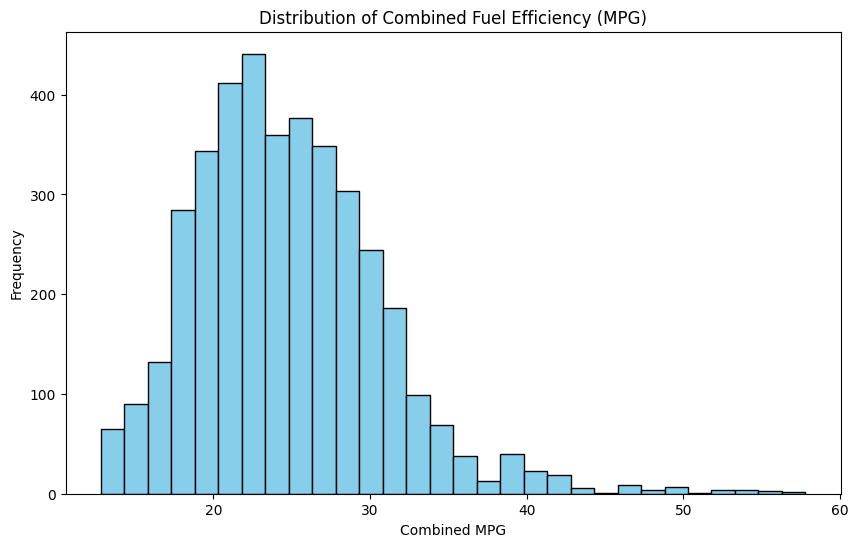

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data['comb'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Combined Fuel Efficiency (MPG)')
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The histogram shows how combined fuel efficiency (MPG) is distributed across vehicles. Most vehicles fall within the 15–30 MPG range, suggesting moderate efficiency, with fewer vehicles having extremely high or low efficiency.

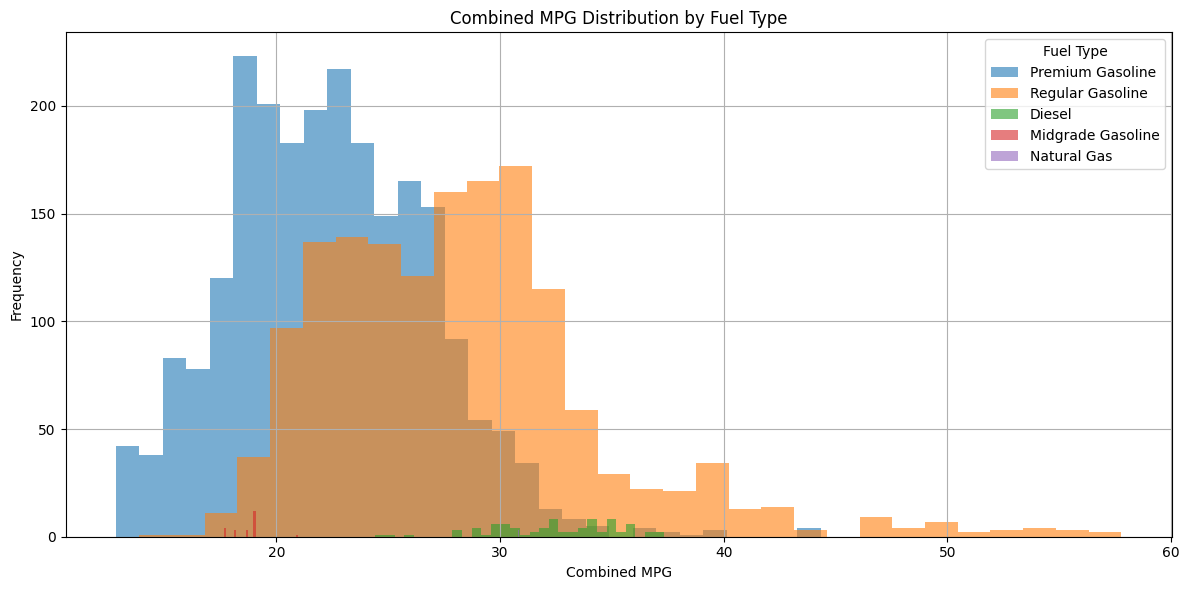

In [14]:
import matplotlib.pyplot as plt

# Get the unique fuel types
fuel_types = data['fuelType'].unique()

# Set up the figure
plt.figure(figsize=(12, 6))

# Loop through each fuel type and plot its histogram
for fuel in fuel_types:
    subset = data[data['fuelType'] == fuel]
    plt.hist(subset['comb'], bins=30, alpha=0.6, label=fuel)

# Finalize the plot
plt.title('Combined MPG Distribution by Fuel Type')
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()


Premium and Regular gasoline vehicles dominate the dataset. Regular gas vehicles tend to have slightly better fuel efficiency, with more peaking in the 25–35 MPG range, while premium ones tend to be more performance-oriented and less efficient.


<ipython-input-16-38e28038a386>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='fuelType', y='comb', palette='Set2')


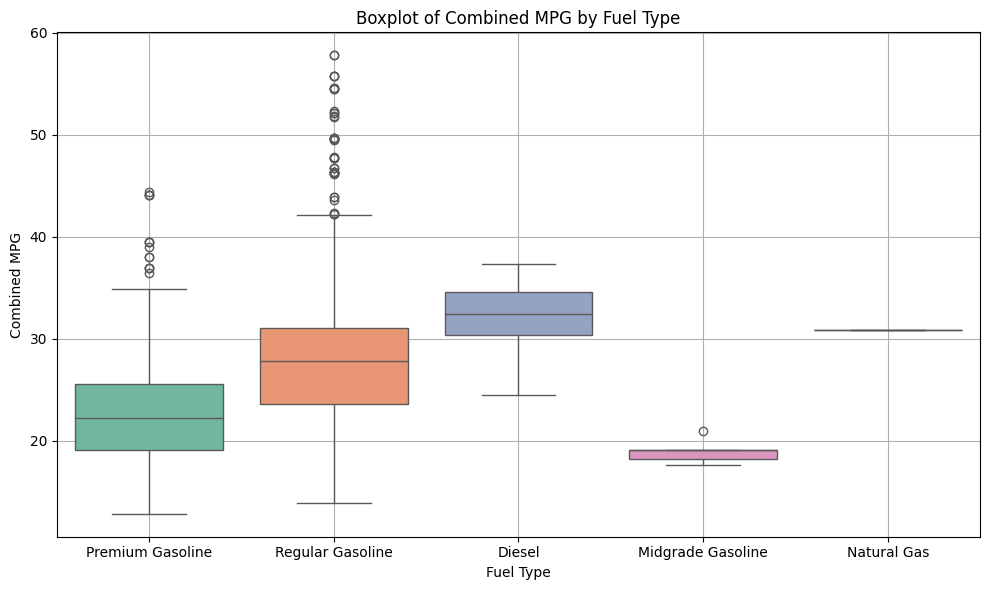

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fuelType', y='comb', palette='Set2')

# Add titles and labels
plt.title('Boxplot of Combined MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Combined MPG')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


The boxplot illustrates the variation in combined MPG (miles per gallon) across different fuel types.

Vehicles powered by Regular Gasoline typically exhibit a higher median MPG with less variability, indicating greater fuel efficiency and consistency in performance.

In contrast, Premium Gasoline vehicles generally reflect lower MPG figures and wider variability. This may be attributed to performance-oriented engine designs that prioritize power over fuel efficiency.

When Diesel fuel is represented, it is often associated with high fuel efficiency metrics, although the dataset may be limited in sample size for this category.

Overall, these findings suggest that fuel type significantly impacts fuel efficiency. Therefore, it is imperative for policymakers and consumers to consider fuel economy in relation to fuel type, particularly when promoting lower-emission and high-efficiency vehicle options.

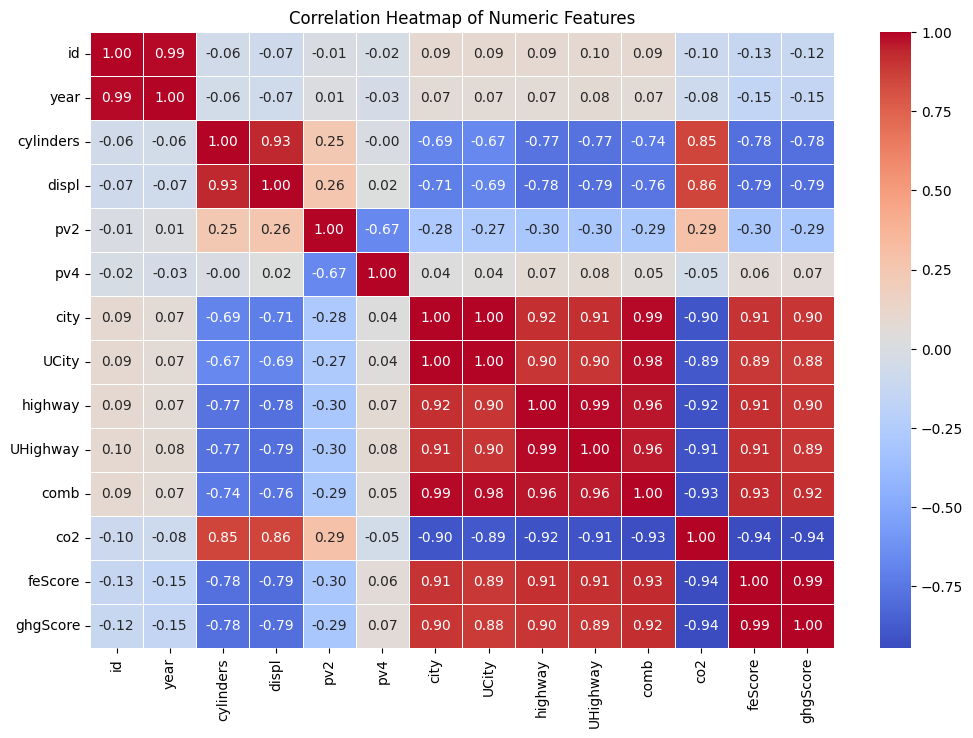

In [13]:
plt.figure(figsize=(12, 8))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


The heatmap analysis reveals several significant correlations among various numeric vehicle attributes:

1. **Engine Displacement (displ)**: There is a strong negative correlation between engine displacement and combined miles per gallon (comb). This finding indicates that vehicles equipped with larger engines tend to exhibit decreased fuel efficiency.

2. **CO2 Emissions**: CO2 emissions demonstrate a strong positive correlation with engine displacement, while also exhibiting negative correlations with the MPG metrics (combined, city, highway). This aligns with expectations, as larger engines typically produce higher CO2 emissions and consume more fuel.

3. **MPG Metrics**: The variables representing city, highway, and combined MPG show a high degree of positive correlation with one another (coefficients greater than 0.9). This suggests redundancy within these metrics, indicating that it may be prudent to retain only the combined MPG as a summary measure while considering the removal of the city and highway MPG figures.

4. **Drop Consideration**: Likewise, if CO2 emissions are being predicted based on the MPG or displacement, it may be justifiable to exclude CO2 as an input variable due to its strong dependency on the other features.

### Conclusion:
To mitigate multicollinearity in future AI models, we recommend considering the following adjustments:
- Retain the combined MPG while eliminating the city and highway MPG variables.
- Exclude CO2 emissions from the feature set if combined MPG and engine displacement are already included as inputs.